# Reading Data File

In [1]:
import pandas as pd
A = pd.read_csv(r'C:\Users\shubham\Anaconda_Files\BigLittle\UNI.csv')

In [2]:
A.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


# Checking for NaN values

In [3]:
A.isna().any()

v.id             False
on road old      False
on road now      False
years            False
km               False
rating           False
condition        False
economy          False
top speed        False
hp               False
torque           False
current price    False
dtype: bool

In [4]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
v.id             1000 non-null int64
on road old      1000 non-null int64
on road now      1000 non-null int64
years            1000 non-null int64
km               1000 non-null int64
rating           1000 non-null int64
condition        1000 non-null int64
economy          1000 non-null int64
top speed        1000 non-null int64
hp               1000 non-null int64
torque           1000 non-null int64
current price    1000 non-null float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


# Plots and Distribution

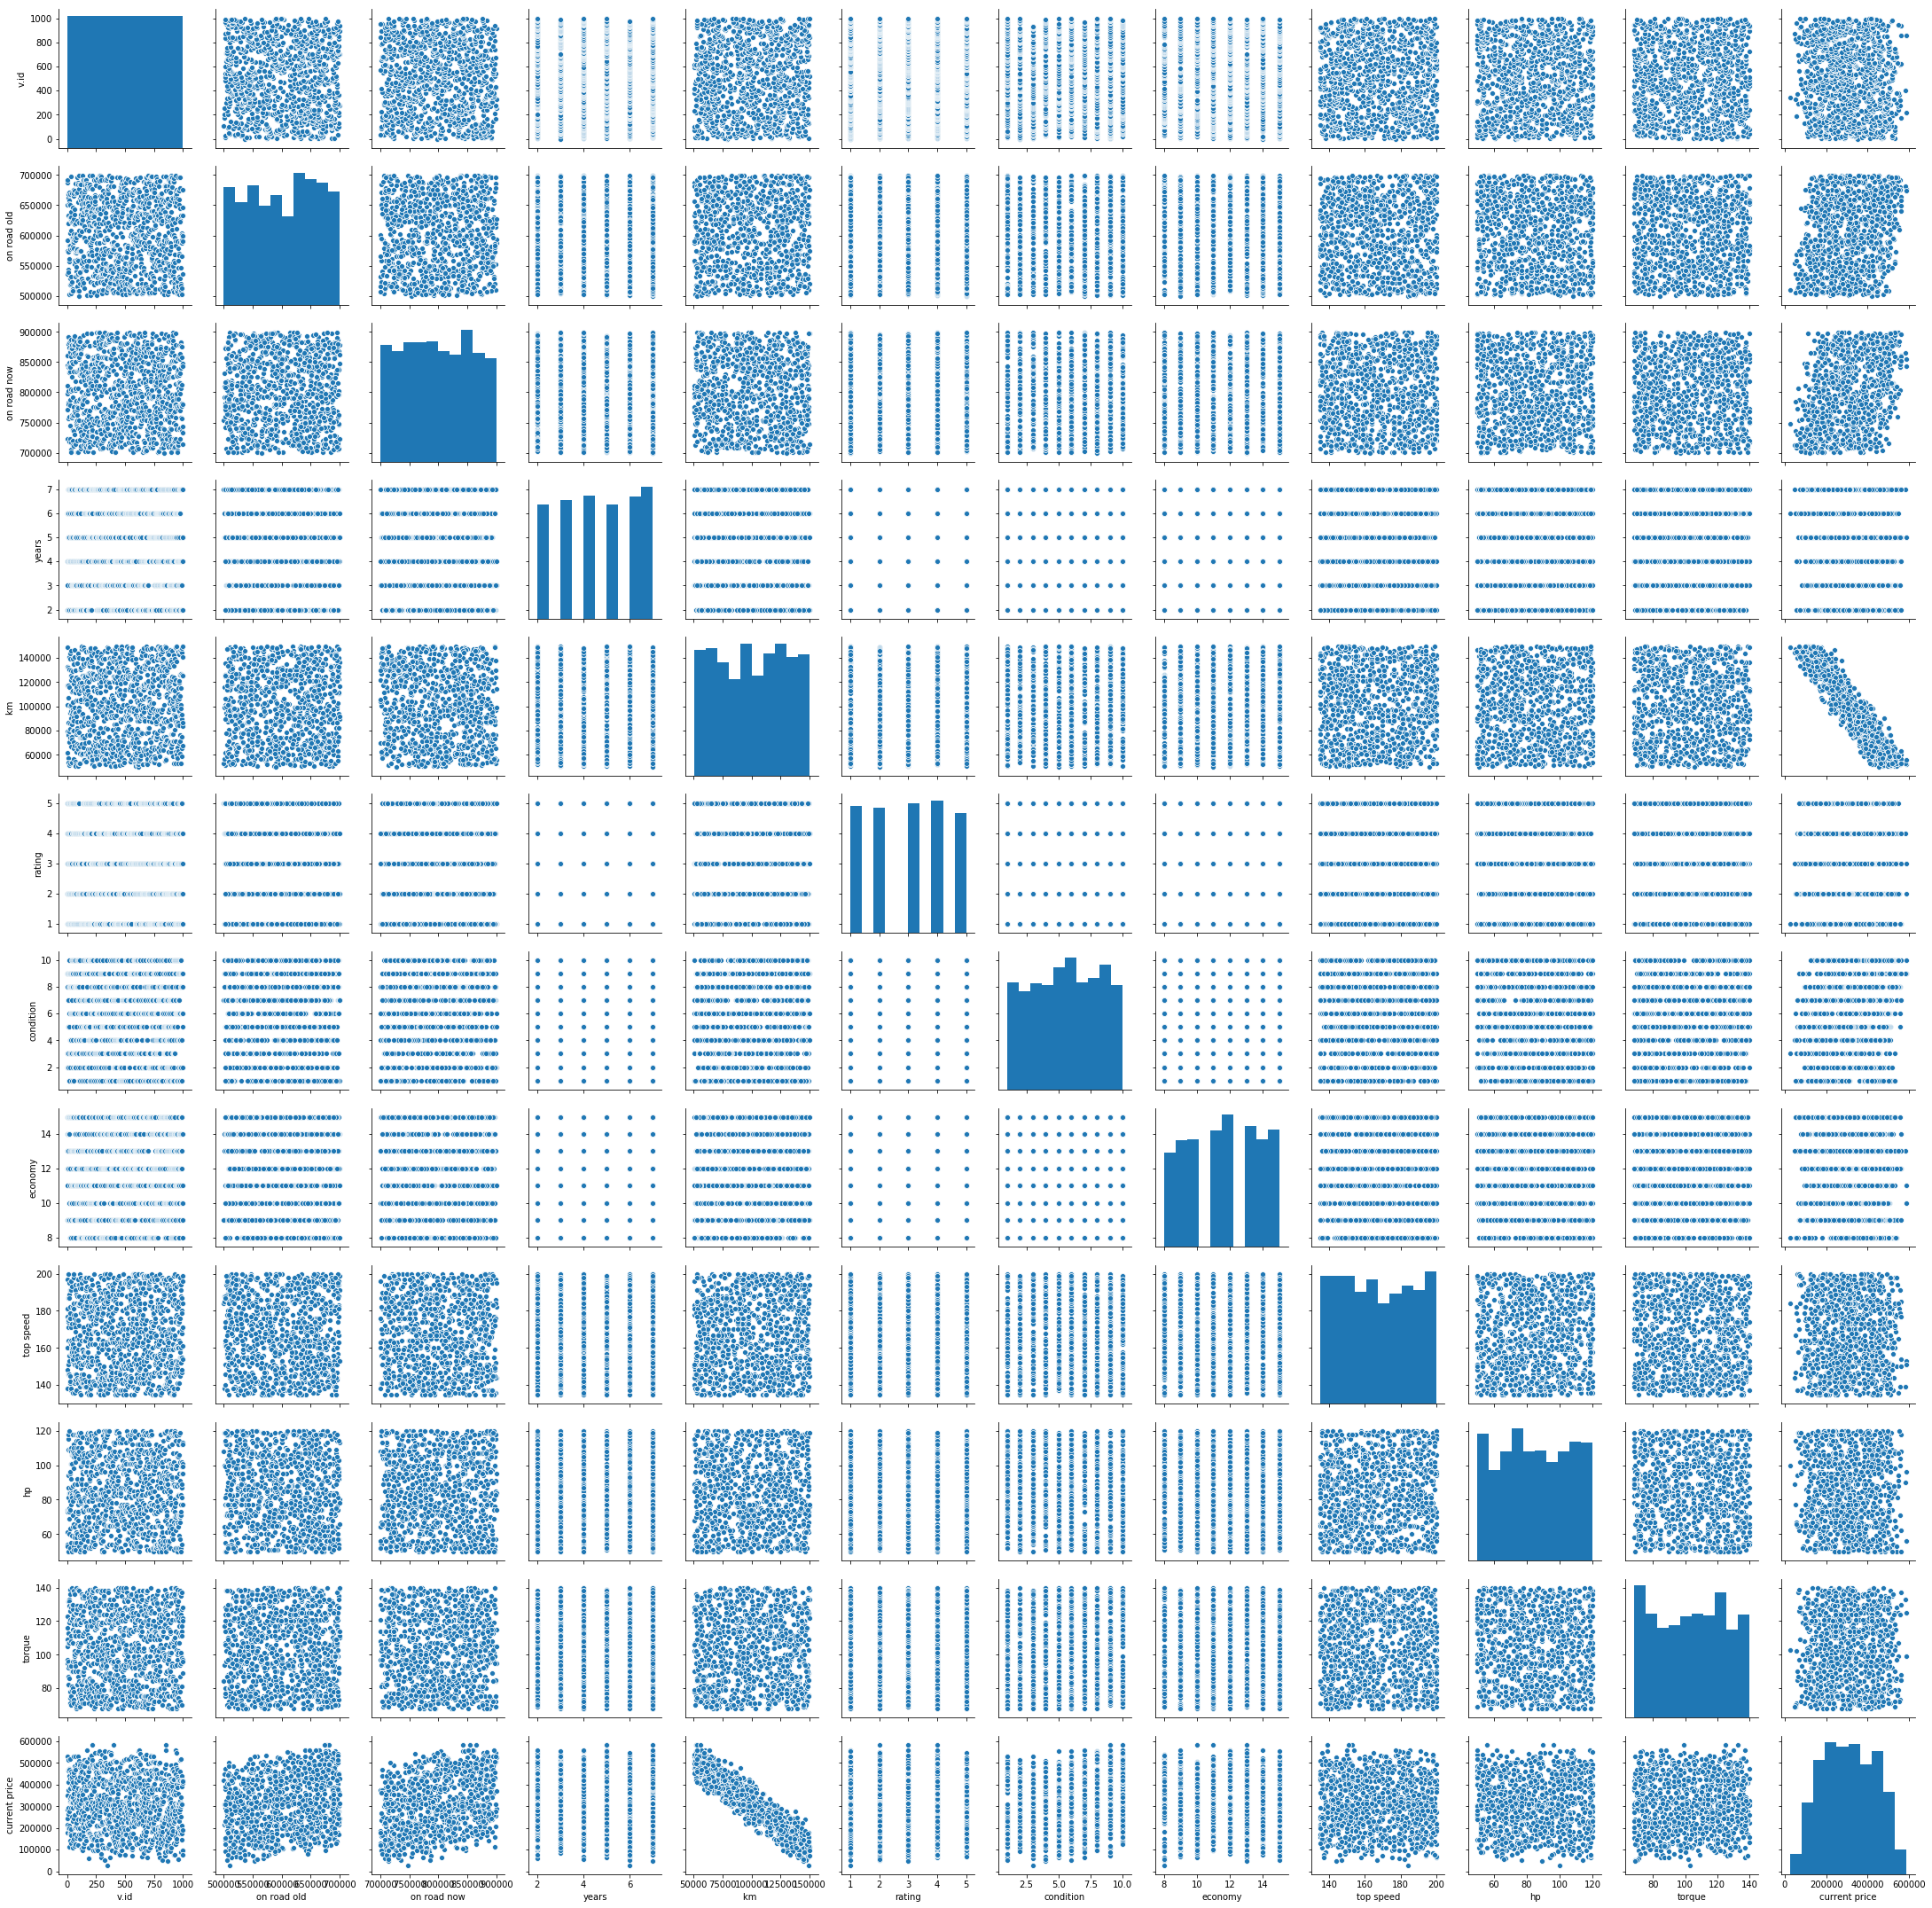

In [5]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
sb.pairplot(A)

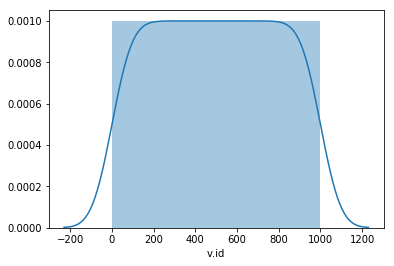

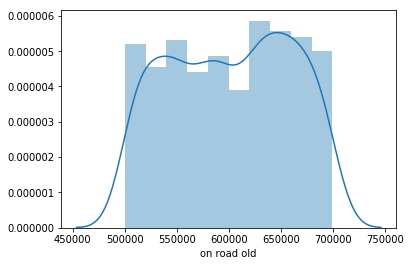

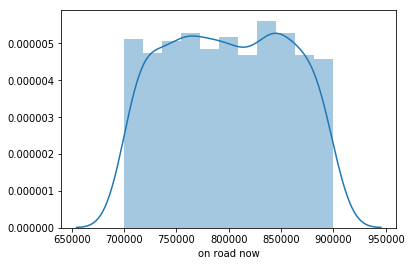

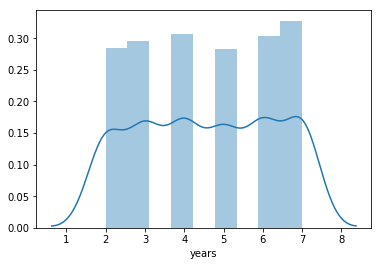

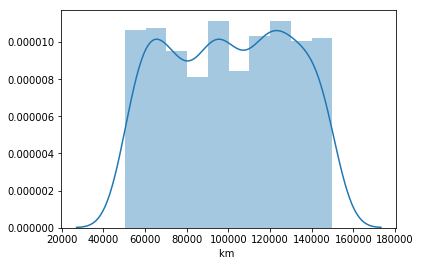

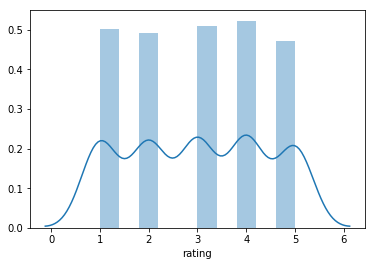

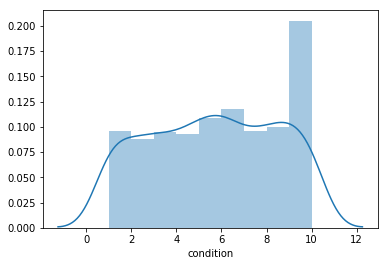

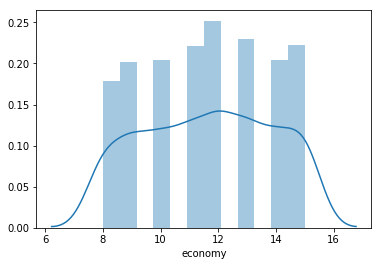

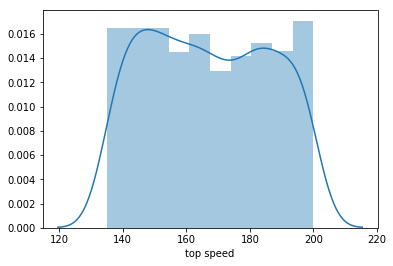

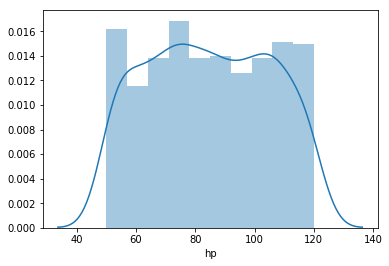

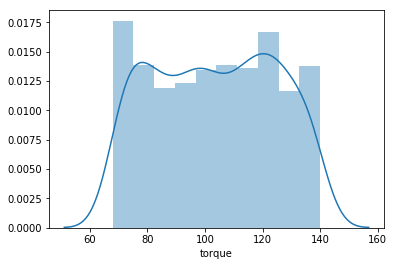

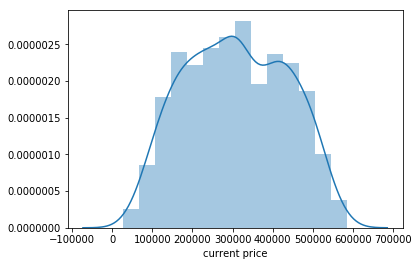

In [6]:
import seaborn as sns
for i in A.columns:
    if A[i].dtypes == 'object':
        sns.countplot(A[i])
        plt.show()
    else:
        sns.distplot(A[i])
        plt.show()

In [7]:
A.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


In [8]:
def scatter(df,outcome):
    import seaborn as sb
    import matplotlib.pyplot as plt
    for i in df.columns:
            sb.scatterplot(df[i],df[outcome])
            plt.show()

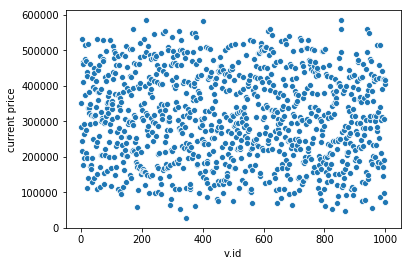

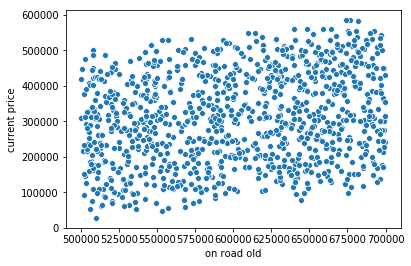

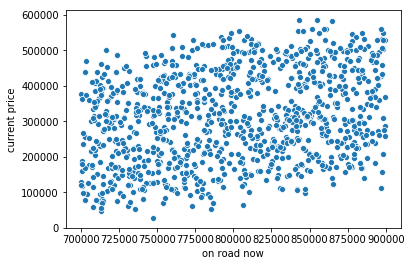

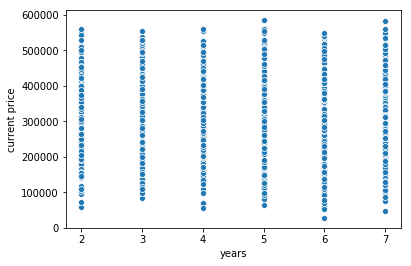

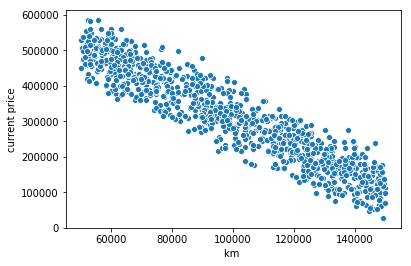

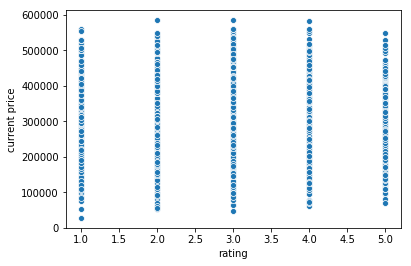

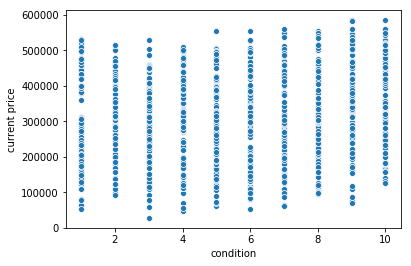

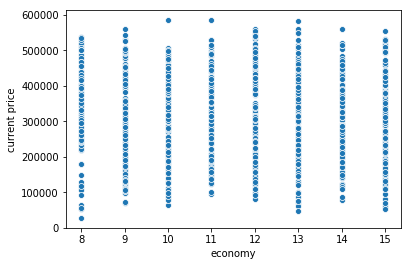

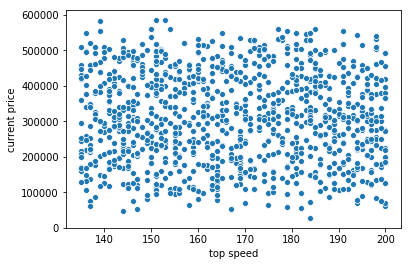

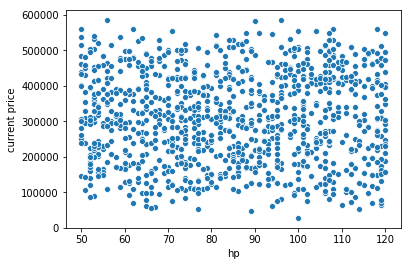

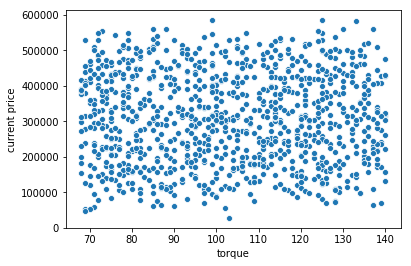

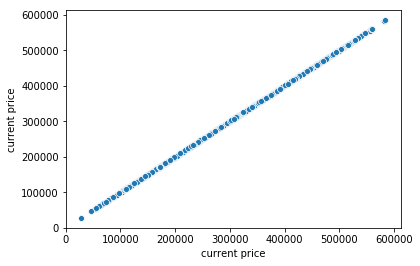

In [9]:
scatter(A,'current price')

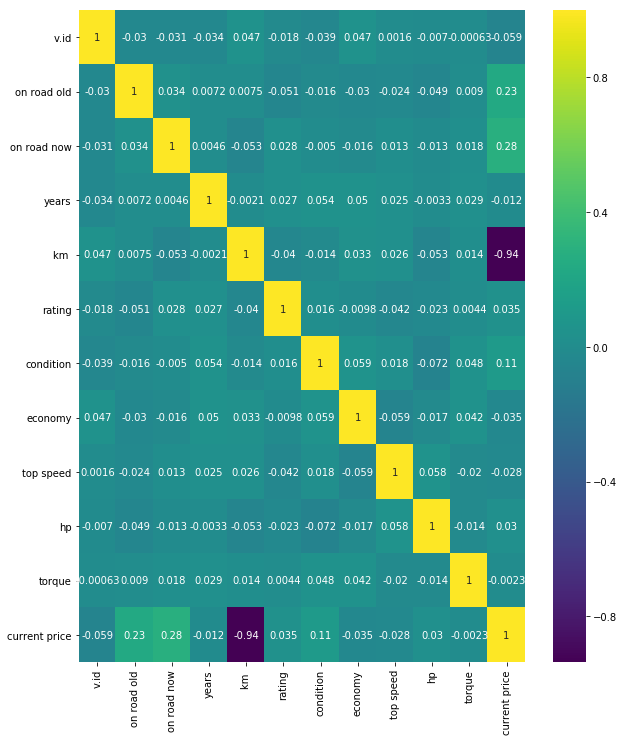

In [10]:
plt.figure(figsize=(10,12))
sns.heatmap(A.corr(),annot=True,cmap='viridis')

# Creating Dependent and Independent Data Sets

In [11]:
B = A.drop('v.id',axis=1)

X = B.drop('current price',axis=1)
Y = B[['current price']]

# Dividing data into Training and validation data sets 

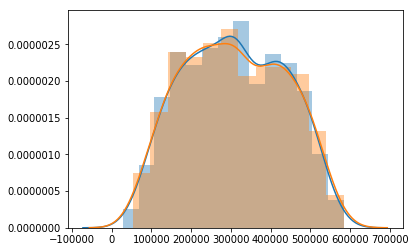

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=16)
sns.distplot(Y)
sns.distplot(ytrain)

# Check for Multi-colinearity using VIF

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):
    vif = pd.DataFrame()
    vif['features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return vif

In [14]:
vif = calculate_vif(X)

In [15]:
vif

,features,VIF
0,on road old,83.201308
1,on road now,120.706875
2,years,8.056407
3,km,12.540514
4,rating,5.493181
5,condition,4.963925
6,economy,26.539267
7,top speed,64.530536
8,hp,17.378673
9,torque,24.281683


In [16]:
while vif['VIF'][vif['VIF']>10].any():
    remove = vif.sort_values('VIF',ascending=0)['features'][:1]
    X.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(X)

In [17]:
vif

,features,VIF
0,years,6.288610
1,km,7.100630
2,rating,4.626279
3,condition,4.335654


# Dividing data into Training and validation data sets 

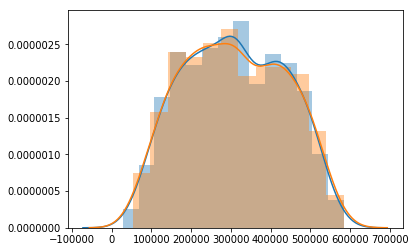

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=16)
sns.distplot(Y)
sns.distplot(ytrain)

# Using Hypothesis testing and dropping variables which are not statstically significant

In [19]:
import statsmodels.api as sm
X2 = sm.add_constant(xtrain)
est = sm.OLS(ytrain,X2)
model = est.fit()
model.summary()

C:\Users\shubham\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          current price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1352.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:50:55   Log-Likelihood:                -8461.3
No. Observations:                 700   AIC:                         1.693e+04
Df Residuals:                     695   BIC:                         1.696e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.022e+05   8711.137     80.612      0.000    6.85e+05    7.19e+05
years      -1036.0870    963.000     -1.076      0.282   -2926.826     854.652
km            -4.0701      0.056    -73.044      0.000      -4.180      -3.961
rating     -1240.9173   1151.049     -1.078      0.281   -3500.867    1019.032
condition   4096.4235    579.887      7.064      0.000    2957.884    5234.963
==============================================================================
Omnibus:                       22.373   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.860
Skew:                          -0.015   Prob(JB):                      0.00438
Kurtosis:                       2.391   Cond. No.                     5.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

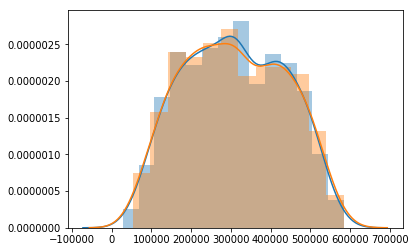

In [20]:
X = X.drop(['years','rating'],axis =1 )
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=16)
sns.distplot(Y)
sns.distplot(ytrain)

In [21]:
import statsmodels.api as sm
X2 = sm.add_constant(xtrain)
est = sm.OLS(ytrain,X2)
model = est.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          current price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     2702.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:50:56   Log-Likelihood:                -8462.5
No. Observations:                 700   AIC:                         1.693e+04
Df Residuals:                     697   BIC:                         1.694e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.936e+05   6684.167    103.768      0.000     6.8e+05    7.07e+05
km            -4.0662      0.056    -73.083      0.000      -4.175      -3.957
condition   4068.6341    579.636      7.019      0.000    2930.593    5206.675
==============================================================================
Omnibus:                       21.561   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.638
Skew:                          -0.026   Prob(JB):                      0.00490
Kurtosis:                       2.398   Cond. No.                     4.28e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
from sklearn.linear_model import LinearRegression
import numpy as np
lr = LinearRegression()
model = lr.fit(xtrain,ytrain)
pred = model.predict(xtest)

from sklearn.metrics import mean_squared_error
print('Linear Regression RMSE:',np.sqrt(mean_squared_error(ytest,pred)/100000))

Linear Regression RMSE: 131.97648975723783


# Generating prediction from Final Model

In [23]:
import pandas as pd
test = pd.read_csv(r'C:\Users\shubham\Anaconda_Files\BigLittle\unitest_1.csv')

df = test[['km ','condition']]
pred_test = model.predict(df)
test['current price'] = pred_test
final = test[['v.id','current price']]
final.to_csv(r'C:\Users\shubham\Anaconda_Files\BigLittle\submission.csv',index=False)